In [2]:
import os
import sys

# os.path.join(os.path.dirname(__file__)
sys.path.append("../")  # location of config file
sys.path.append("../../") 


import config

os.chdir("../../") # working directory inside exploration

import glob
import numpy as np
from smartprint import smartprint as sprint
from preprocessing.ProcessRaw import ProcessRaw
from smartprint import smartprint as sprint
import random
from tqdm import tqdm
import matplotlib.pyplot as plt

In [15]:
city_color = {"london" : "red", 
             "melbourne": "blue",
             "madrid": "green"}

madrid 1 1 55


madrid_55_days processed:  91%|███████████████████████████████████████████████████████████████████████████████████████████████▌         | 214/235 [00:00<00:00, 8304.25it/s]


start_date, end_date : 2022-01-01 2021-12-31
"Reached end of dates, skipping....Total #dates processed=", len(dates) : Reached end of dates, skipping....Total #dates processed= 214


/Users/nishant/Downloads/NeurIPS2022-traffic4cast/train_data_all_cities/madrid-1-1-55-:   0%|                                                       | 0/214 [00:00<?, ?it/s]
Iterating over 100 random source files: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:51<00:00,  1.12s/it]


prefix : madrid-1-1-55-
melbourne 1 1 55


melbourne_55_days processed:  91%|████████████████████████████████████████████████████████████████████████████████████████████▍         | 213/235 [00:00<00:00, 1934.45it/s]


start_date, end_date : 2020-12-31 2020-12-30
"Reached end of dates, skipping....Total #dates processed=", len(dates) : Reached end of dates, skipping....Total #dates processed= 213


/Users/nishant/Downloads/NeurIPS2022-traffic4cast/train_data_all_cities/melbourne-1-1-55-:   0%|                                                    | 0/213 [00:00<?, ?it/s]
Iterating over 100 random source files: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [02:21<00:00,  1.42s/it]


prefix : melbourne-1-1-55-
london 1 1 55


london_55_days processed:  91%|████████████████████████████████████████████████████████████████████████████████████████████████         | 215/235 [00:00<00:00, 3476.89it/s]


start_date, end_date : 2020-02-01 2020-01-31
"Reached end of dates, skipping....Total #dates processed=", len(dates) : Reached end of dates, skipping....Total #dates processed= 215


/Users/nishant/Downloads/NeurIPS2022-traffic4cast/train_data_all_cities/london-1-1-55-:   0%|                                                       | 0/215 [00:00<?, ?it/s]
Iterating over 100 random source files: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [02:17<00:00,  1.38s/it]


prefix : london-1-1-55-


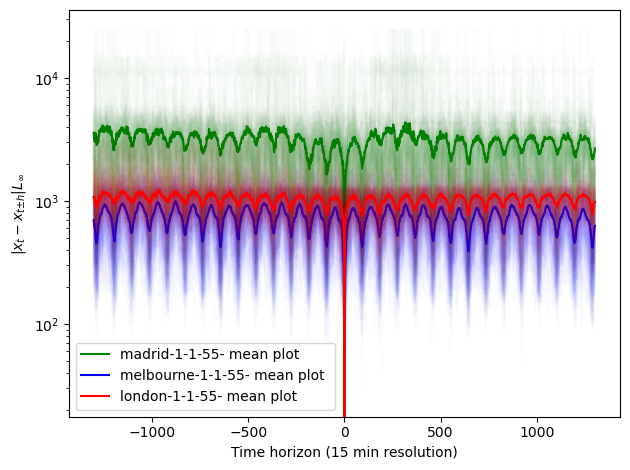

In [28]:
for city in config.city_list_def    for io_len in [1]: # range(1,9):
        for pred_horiz in [1]: # config.pred_horiz_def:
            for scale in config.scales_def:
                print (city, io_len, pred_horiz, scale)

                prefix = ProcessRaw.file_prefix(cityname=city, io_length=io_len, pred_horiz=pred_horiz, scale=scale)

                obj = ProcessRaw(cityname=city, i_o_length=io_len, prediction_horizon=pred_horiz, grid_size=scale)
                    
                folderpath = os.path.join(config.DATA_FOLDER, config.train_folder_name, prefix)
                filenameslist = glob.glob(folderpath + "/*_x.npy")
                
                random.shuffle(filenameslist)
                
                
                multiple_source_distance_list = []
                for _ in tqdm(range(100), desc="Iterating over 100 random source files"):
                    random.shuffle(filenameslist) # inefficient method of choosing a random filename
                    
                    dist_list = []
                    
                    
                    
                    # choose_filename until we get something in the middle of the dataset so that 
                    # we can iterate over weeks
                    
                    
                    source_file = filenameslist[0]
                    source_x = np.load(source_file)
                    # integer id of filename
                    n = int(source_file.split(prefix)[-1].replace("_x.npy", ""))
                    
                    while ( n - 14 * obj.offset < 0 or n + 14 * obj.offset > 8500 ): # 8500 number of training data points across all scenarios.
                        # keep looking for a source point near the centre of the dataset 
                        # so that we can look one week ahead and behind
                        
                        random.shuffle(filenameslist) # inefficient method of choosing a random filename
                        
                        source_file = filenameslist[0]
                        # integer id of filename
                        n = int(source_file.split(prefix)[-1].replace("_x.npy", ""))
                        source_x = np.load(source_file)

                        
                    # sprint (n)

                    # Now, we iterate through one week of temporal neighbours
                    # 2 weeks before and 2 weeks after
                    for i in range(n-14*obj.offset, n+14*obj.offset):

                        neighbour_filename = (source_file.split(prefix)[0] + \
                                   prefix + \
                                   source_file.split(prefix)[1] + \
                                   prefix + \
                                   str(i) + "_x.npy")
                        neighbour = np.load(neighbour_filename)
                        
                        dist_list.append (np.max(np.abs( neighbour - source_x)) )
                        
                    multiple_source_distance_list.append(dist_list)
                    plt.plot(range(-14*obj.offset, 14*obj.offset), (dist_list), alpha=0.01, color=city_color[city])
                    
                multiple_source_distance_list = np.array(multiple_source_distance_list)
                
                mean_plot = (np.mean(multiple_source_distance_list, axis=0))
                plt.plot(range(-14*obj.offset, +14*obj.offset), (mean_plot), label= prefix + " mean plot ", color=city_color[city])
                
                # median_plot = (np.median(multiple_source_distance_list, axis=0))
                # plt.plot(np.convolve(median_plot, [1/1]*1, "valid"), label= prefix + " median plot ")
                
                
                sprint (prefix)
            #     break
            # break
        # break
    # break
plt.ylabel(r'$\|x_t-x_{t{\pm}h}\|L_{\infty}$')
plt.legend()
plt.xlabel("Time horizon (15 min resolution)")
plt.yscale('log')
plt.tight_layout()
plt.show()   # obj._clean_intermediate_files()

london 1 1 25


london_25_days processed:  91%|████████████████████████████████████████████████████████████████████████████████████████████████         | 215/235 [00:00<00:00, 8756.89it/s]


start_date, end_date : 2020-02-01 2020-01-31
"Reached end of dates, skipping....Total #dates processed=", len(dates) : Reached end of dates, skipping....Total #dates processed= 215


/Users/nishant/Downloads/NeurIPS2022-traffic4cast/train_data_all_cities/london-1-1-25-:   0%|                                                       | 0/215 [00:00<?, ?it/s]
Iterating over 100 random source files: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:44<00:00,  1.05s/it]


prefix : london-1-1-25-
london 1 1 35


london_35_days processed:  91%|███████████████████████████████████████████████████████████████████████████████████████████████▏        | 215/235 [00:00<00:00, 10005.16it/s]


start_date, end_date : 2020-02-01 2020-01-31
"Reached end of dates, skipping....Total #dates processed=", len(dates) : Reached end of dates, skipping....Total #dates processed= 215


/Users/nishant/Downloads/NeurIPS2022-traffic4cast/train_data_all_cities/london-1-1-35-:   0%|                                                       | 0/215 [00:00<?, ?it/s]
Iterating over 100 random source files: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:46<00:00,  1.06s/it]


prefix : london-1-1-35-
london 1 1 45


london_45_days processed:  91%|████████████████████████████████████████████████████████████████████████████████████████████████         | 215/235 [00:00<00:00, 9706.22it/s]


start_date, end_date : 2020-02-01 2020-01-31
"Reached end of dates, skipping....Total #dates processed=", len(dates) : Reached end of dates, skipping....Total #dates processed= 215


/Users/nishant/Downloads/NeurIPS2022-traffic4cast/train_data_all_cities/london-1-1-45-:   0%|                                                       | 0/215 [00:00<?, ?it/s]
Iterating over 100 random source files: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [02:06<00:00,  1.26s/it]


prefix : london-1-1-45-
london 1 1 55


london_55_days processed:  91%|████████████████████████████████████████████████████████████████████████████████████████████████         | 215/235 [00:00<00:00, 9742.18it/s]


start_date, end_date : 2020-02-01 2020-01-31
"Reached end of dates, skipping....Total #dates processed=", len(dates) : Reached end of dates, skipping....Total #dates processed= 215


/Users/nishant/Downloads/NeurIPS2022-traffic4cast/train_data_all_cities/london-1-1-55-:   0%|                                                       | 0/215 [00:00<?, ?it/s]
Iterating over 100 random source files: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:56<00:00,  1.16s/it]


prefix : london-1-1-55-
london 1 1 65


london_65_days processed:  91%|████████████████████████████████████████████████████████████████████████████████████████████████         | 215/235 [00:00<00:00, 6595.49it/s]


start_date, end_date : 2020-02-01 2020-01-31
"Reached end of dates, skipping....Total #dates processed=", len(dates) : Reached end of dates, skipping....Total #dates processed= 215


/Users/nishant/Downloads/NeurIPS2022-traffic4cast/train_data_all_cities/london-1-1-65-: 100%|█████████████████████████████████████████████| 215/215 [00:33<00:00,  6.36it/s]


self.key_dimensions(), tcount, vcount : london-1-1-65- 9660 10120
 : 9660 9660
 : 10120 10120


Iterating over 100 random source files: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [03:12<00:00,  1.92s/it]


prefix : london-1-1-65-
london 1 1 75


london_75_days processed:  91%|████████████████████████████████████████████████████████████████████████████████████████████████         | 215/235 [00:00<00:00, 3782.01it/s]


start_date, end_date : 2020-02-01 2020-01-31
"Reached end of dates, skipping....Total #dates processed=", len(dates) : Reached end of dates, skipping....Total #dates processed= 215


/Users/nishant/Downloads/NeurIPS2022-traffic4cast/train_data_all_cities/london-1-1-75-: 100%|█████████████████████████████████████████████| 215/215 [00:36<00:00,  5.81it/s]


self.key_dimensions(), tcount, vcount : london-1-1-75- 9660 10120
 : 9660 9660
 : 10120 10120


Iterating over 100 random source files: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [02:41<00:00,  1.61s/it]


prefix : london-1-1-75-
london 1 1 85


london_85_days processed:  91%|████████████████████████████████████████████████████████████████████████████████████████████████         | 215/235 [00:00<00:00, 3957.38it/s]


start_date, end_date : 2020-02-01 2020-01-31
"Reached end of dates, skipping....Total #dates processed=", len(dates) : Reached end of dates, skipping....Total #dates processed= 215


/Users/nishant/Downloads/NeurIPS2022-traffic4cast/train_data_all_cities/london-1-1-85-: 100%|█████████████████████████████████████████████| 215/215 [00:42<00:00,  5.05it/s]


self.key_dimensions(), tcount, vcount : london-1-1-85- 9660 10120
 : 9660 9660
 : 10120 10120


Iterating over 100 random source files: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [02:41<00:00,  1.61s/it]


prefix : london-1-1-85-
london 1 1 95


london_95_days processed:  91%|████████████████████████████████████████████████████████████████████████████████████████████████         | 215/235 [00:00<00:00, 3557.66it/s]


start_date, end_date : 2020-02-01 2020-01-31
"Reached end of dates, skipping....Total #dates processed=", len(dates) : Reached end of dates, skipping....Total #dates processed= 215


/Users/nishant/Downloads/NeurIPS2022-traffic4cast/train_data_all_cities/london-1-1-95-: 100%|█████████████████████████████████████████████| 215/215 [00:50<00:00,  4.29it/s]


self.key_dimensions(), tcount, vcount : london-1-1-95- 9660 10120
 : 9660 9660
 : 10120 10120


Iterating over 100 random source files: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [02:46<00:00,  1.67s/it]


prefix : london-1-1-95-


/var/folders/dp/q2rz500s2kj79pnbkf36h7ch0000gq/T/ipykernel_48297/887096452.py:85: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


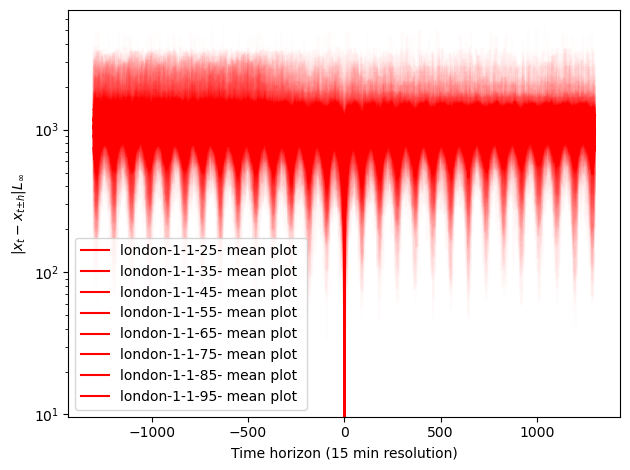

In [31]:
for cityname in config.city_list_def:
    for io_len in [1]: # range(1,9):
        for pred_horiz in [1]: # config.pred_horiz_def:
            for scale in config.scales:
                
                city = cityname.lower()
                
                print (city, io_len, pred_horiz, scale)

                prefix = ProcessRaw.file_prefix(cityname=city, io_length=io_len, pred_horiz=pred_horiz, scale=scale)

                obj = ProcessRaw(cityname=city, i_o_length=io_len, prediction_horizon=pred_horiz, grid_size=scale)
                    
                folderpath = os.path.join(config.DATA_FOLDER, config.train_folder_name, prefix)
                filenameslist = glob.glob(folderpath + "/*_x.npy")
                
                random.shuffle(filenameslist)
                
                
                multiple_source_distance_list = []
                for _ in tqdm(range(100), desc="Iterating over 100 random source files"):
                    random.shuffle(filenameslist) # inefficient method of choosing a random filename
                    
                    dist_list = []
                    
                    
                    
                    # choose_filename until we get something in the middle of the dataset so that 
                    # we can iterate over weeks
                    
                    
                    source_file = filenameslist[0]
                    source_x = np.load(source_file)
                    # integer id of filename
                    n = int(source_file.split(prefix)[-1].replace("_x.npy", ""))
                    
                    while ( n - 14 * obj.offset <= 0 or n + 14 * obj.offset > 8500 ): # 8500 number of training data points across all scenarios.
                        # keep looking for a source point near the centre of the dataset 
                        # so that we can look one week ahead and behind
                        
                        random.shuffle(filenameslist) # inefficient method of choosing a random filename
                        
                        source_file = filenameslist[0]
                        # integer id of filename
                        n = int(source_file.split(prefix)[-1].replace("_x.npy", ""))
                        source_x = np.load(source_file)

                        
                    # sprint (n)

                    # Now, we iterate through one week of temporal neighbours
                    # 2 weeks before and 2 weeks after
                    for i in range(n-14*obj.offset, n+14*obj.offset):

                        neighbour_filename = (source_file.split(prefix)[0] + \
                                   prefix + \
                                   source_file.split(prefix)[1] + \
                                   prefix + \
                                   str(i) + "_x.npy")
                        neighbour = np.load(neighbour_filename)
                        
                        dist_list.append (np.max(np.abs( neighbour - source_x)) )
                        
                    multiple_source_distance_list.append(dist_list)
                    plt.plot(range(-14*obj.offset, 14*obj.offset), (dist_list), alpha=0.01, color=city_color[city])
                    
                multiple_source_distance_list = np.array(multiple_source_distance_list)
                
                mean_plot = (np.mean(multiple_source_distance_list, axis=0))
                plt.plot(range(-14*obj.offset, +14*obj.offset), (mean_plot), label= prefix + " mean plot ", color=city_color[city])
                
                # median_plot = (np.median(multiple_source_distance_list, axis=0))
                # plt.plot(np.convolve(median_plot, [1/1]*1, "valid"), label= prefix + " median plot ")
                
                
                sprint (prefix)
            #     break
            # break
        # break
    # break
plt.ylabel(r'$\|x_t-x_{t{\pm}h}\|L_{\infty}$')
plt.legend()
plt.xlabel("Time horizon (15 min resolution)")
plt.yscale('log')
plt.tight_layout()
plt.show()   # obj._clean_intermediate_files()

In [ ]:
for city in config.city_list_def:
    for io_len in [1]: # range(1,9):
        for pred_horiz in config.pred_horiz_def:
            for scale in config.scales_def:
                print (city, io_len, pred_horiz, scale)

                prefix = ProcessRaw.file_prefix(cityname=city, io_length=io_len, pred_horiz=pred_horiz, scale=scale)

                obj = ProcessRaw(cityname=city, i_o_length=io_len, prediction_horizon=pred_horiz, grid_size=scale)
                    
                folderpath = os.path.join(config.DATA_FOLDER, config.train_folder_name, prefix)
                filenameslist = glob.glob(folderpath + "/*_x.npy")
                
                random.shuffle(filenameslist)
                
                
                multiple_source_distance_list = []
                for _ in tqdm(range(100), desc="Iterating over 100 random source files"):
                    random.shuffle(filenameslist) # inefficient method of choosing a random filename
                    
                    dist_list = []
                    
                    
                    
                    # choose_filename until we get something in the middle of the dataset so that 
                    # we can iterate over weeks
                    
                    
                    source_file = filenameslist[0]
                    source_x = np.load(source_file)
                    # integer id of filename
                    n = int(source_file.split(prefix)[-1].replace("_x.npy", ""))
                    
                    while ( n - 14 * obj.offset < 0 or n + 14 * obj.offset > 8500 ): # 8500 number of training data points across all scenarios.
                        # keep looking for a source point near the centre of the dataset 
                        # so that we can look one week ahead and behind
                        
                        random.shuffle(filenameslist) # inefficient method of choosing a random filename
                        
                        source_file = filenameslist[0]
                        # integer id of filename
                        n = int(source_file.split(prefix)[-1].replace("_x.npy", ""))
                        source_x = np.load(source_file)

                        
                    # sprint (n)

                    # Now, we iterate through one week of temporal neighbours
                    # 2 weeks before and 2 weeks after
                    for i in range(n-14*obj.offset, n+14*obj.offset):

                        neighbour_filename = (source_file.split(prefix)[0] + \
                                   prefix + \
                                   source_file.split(prefix)[1] + \
                                   prefix + \
                                   str(i) + "_x.npy")
                        neighbour = np.load(neighbour_filename)
                        
                        dist_list.append (np.max(np.abs( neighbour - source_x)) )
                        
                    multiple_source_distance_list.append(dist_list)
                    plt.plot(range(-14*obj.offset, 14*obj.offset), (dist_list), alpha=0.01, color=city_color[city])
                    
                multiple_source_distance_list = np.array(multiple_source_distance_list)
                
                mean_plot = (np.mean(multiple_source_distance_list, axis=0))
                plt.plot(range(-14*obj.offset, +14*obj.offset), (mean_plot), label= prefix + " mean plot ", color=city_color[city])
                
                # median_plot = (np.median(multiple_source_distance_list, axis=0))
                # plt.plot(np.convolve(median_plot, [1/1]*1, "valid"), label= prefix + " median plot ")
                
                
                sprint (prefix)
            #     break
            # break
        # break
    # break
plt.ylabel(r'$\|x_t-x_{t{\pm}h}\|L_{\infty}$')
plt.legend()
plt.xlabel("Time horizon (15 min resolution)")
plt.yscale('log')
plt.tight_layout()
plt.show()   # obj._clean_intermediate_files()

In [20]:
obj.offset

5